<a href="https://colab.research.google.com/github/KiarashMafi/Bear-Classifier/blob/main/bear_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = Path("/content/drive/MyDrive/Colab Notebooks/Bear Detection/data")

In [3]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                  # grabs all images under data/
    splitter=RandomSplitter(0.2, seed=42),      # 80/20 train/valid split
    get_y=parent_label,                         # folder name = label
    item_tfms=Resize(256)
)

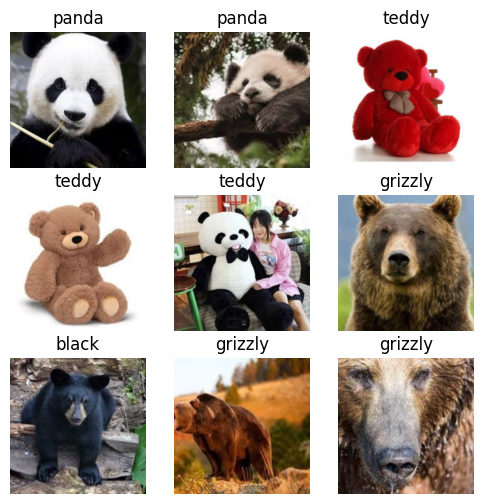

In [4]:
dls = dblock.dataloaders(path, bs=64)
dls.show_batch(max_n=9, figsize=(6,6))

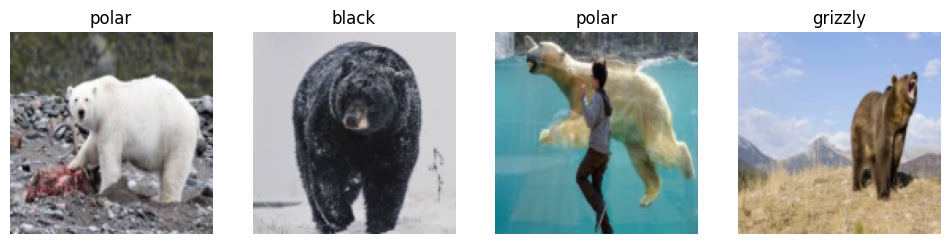

In [5]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

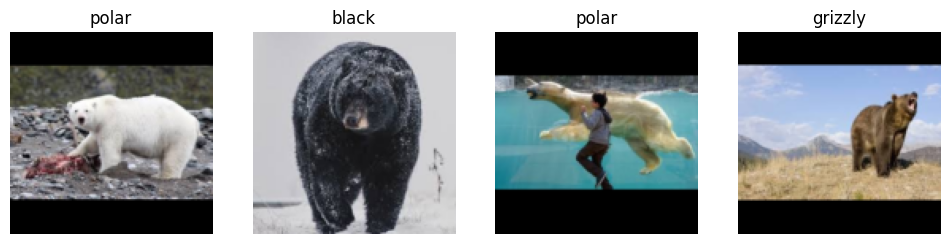

In [6]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

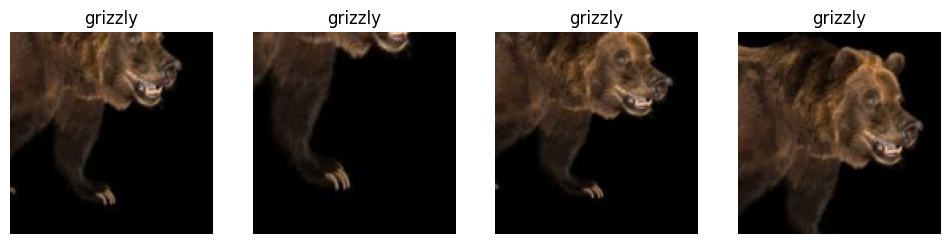

In [7]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dblock.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

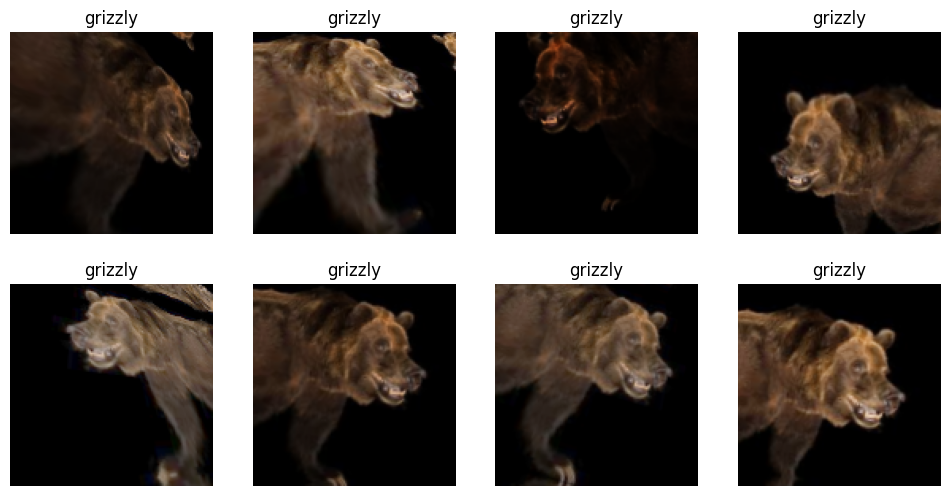

In [8]:
bears = dblock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [9]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.290921,1.709750,0.573770,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.879083,0.426471,0.163934,00:02
1,0.617957,0.111666,0.049180,00:02
2,0.437889,0.055358,0.016393,00:02
3,0.339898,0.044628,0.016393,00:02


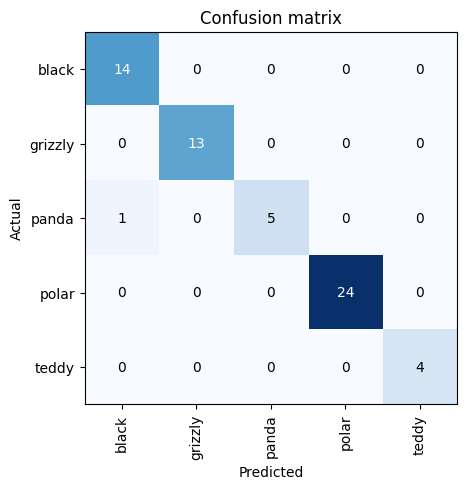

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

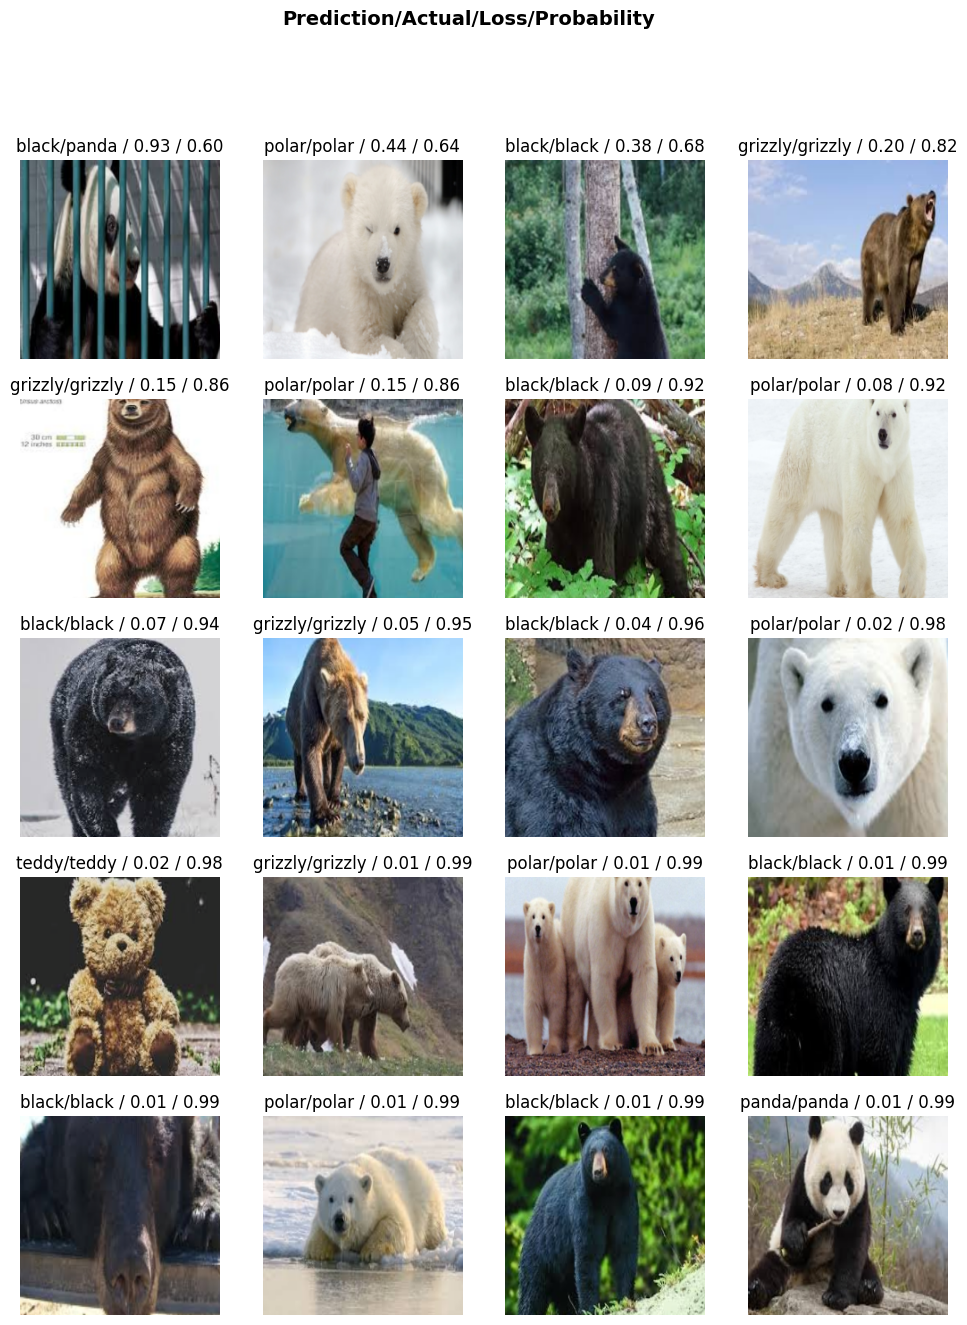

In [14]:
interp.plot_top_losses(20, nrows=5)

In [13]:
learn.export()